# Pin study: comparing CE and multigroup results within OpenMC

# 4 regions in fuel

## Import modules

In [18]:
import sys
import os

import openmc
import openmc.mgxs as mgxs

import numpy as np
import matplotlib.pyplot as plt
import copy as copy

import pandas as pd
from IPython.display import Image
import glob

## Add location of OpenMC XS executable, setup ENDF xs path

In [19]:
import os

# Add path to OpenMC binary
# os.environ['PATH'] += r':/path/to/openmc/bin'
os.environ['PATH'] += r':/Users/jean.ragusa/repo/openmc/local/bin'

# Add location of OpenMC xs data
%env OPENMC_CROSS_SECTIONS=/Users/jean.ragusa/repo/endfb-viii.0-hdf5/cross_sections.xml

env: OPENMC_CROSS_SECTIONS=/Users/jean.ragusa/repo/endfb-viii.0-hdf5/cross_sections.xml


## Cleanup .xml files 

In [20]:
# clean_file_list = ["model.xml", "materials.xml", "geometry.xml","plots.xml","geometry.xml",\
#                    "settings.xml","tallies.out","summary.h5","statepoint.50.h5"]

# for file in clean_file_list :
#     path_file = os.path.join(os.getcwd(), file)
#     if os.path.exists(path_file):
#         os.remove(path_file)

## Start model

In [21]:
model=openmc.Model()

### Define Materials

In [22]:
uo2 = openmc.Material(name='uo2')

uo2.add_nuclide('U234', 6.11864E-06, 'ao')
uo2.add_nuclide('U235', 7.18132E-04, 'ao')
uo2.add_nuclide('U236', 3.29861E-06, 'ao')
uo2.add_nuclide('U238', 2.21546E-02, 'ao')
uo2.add_nuclide('O16', 4.57642E-02, 'ao')

uo2.set_density('g/cm3', 10.257 )

In [23]:
zirconium = openmc.Material(name="zirconium")

zirconium.add_nuclide('Zr90', 2.18865E-02, 'ao')
zirconium.add_nuclide('Zr91', 4.77292E-03, 'ao')
zirconium.add_nuclide('Zr92', 7.29551E-03, 'ao')
zirconium.add_nuclide('Zr94', 7.39335E-03, 'ao')
zirconium.add_nuclide('Zr96', 1.19110E-03, 'ao')
zirconium.add_nuclide('Sn112',4.68066E-06, 'ao')
zirconium.add_nuclide('Sn114', 3.18478E-06, 'ao')
zirconium.add_nuclide('Sn115', 1.64064E-06, 'ao')
zirconium.add_nuclide('Sn116', 7.01616E-05, 'ao')
zirconium.add_nuclide('Sn117', 3.70592E-05, 'ao')
zirconium.add_nuclide('Sn118', 1.16872E-04, 'ao')
zirconium.add_nuclide('Sn119', 4.14504E-05, 'ao')
zirconium.add_nuclide('Sn120', 1.57212E-04, 'ao')
zirconium.add_nuclide('Sn122', 2.23417E-05, 'ao')
zirconium.add_nuclide('Sn124', 2.79392E-05, 'ao')
zirconium.add_nuclide('Fe54', 8.68307E-06, 'ao')
zirconium.add_nuclide('Fe56', 1.36306E-04, 'ao')
zirconium.add_nuclide('Fe57', 3.14789E-06, 'ao')
zirconium.add_nuclide('Fe58', 4.18926E-07, 'ao')
zirconium.add_nuclide('Cr50', 3.30121E-06, 'ao')
zirconium.add_nuclide('Cr52', 6.36606E-05, 'ao')
zirconium.add_nuclide('Cr53', 7.21860E-06, 'ao')
zirconium.add_nuclide('Cr54', 1.79686E-06, 'ao')
zirconium.add_nuclide('Hf174', 3.54138E-09, 'ao')
zirconium.add_nuclide('Hf176', 1.16423E-07, 'ao')
zirconium.add_nuclide('Hf177', 4.11686E-07, 'ao')
zirconium.add_nuclide('Hf178', 6.03806E-07, 'ao')
zirconium.add_nuclide('Hf179', 3.01460E-07, 'ao')
zirconium.add_nuclide('Hf180', 7.76449E-07, 'ao')

zirconium.set_density('g/cm3',  6.56)

In [24]:
water = openmc.Material(name="water")

water.add_nuclide('H1',4.96224E-02, 'ao')
water.add_nuclide('O16', 2.48112E-02, 'ao')
water.add_nuclide('B10', 1.07070E-05, 'ao')
water.add_nuclide('B11', 4.30971E-05, 'ao')

water.set_density('g/cm3', 0.743)

water.add_s_alpha_beta('c_H_in_H2O')

In [25]:
# materials_file = openmc.Materials([uo2, zirconium, water]) 

model.materials = openmc.Materials([uo2, zirconium, water]) 
print(model.materials)

[Material
	ID             =	4
	Name           =	uo2
	Temperature    =	None
	Density        =	10.257 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U234           =	6.11864e-06  [ao]
	U235           =	0.000718132  [ao]
	U236           =	3.29861e-06  [ao]
	U238           =	0.0221546    [ao]
	O16            =	0.0457642    [ao]
, Material
	ID             =	5
	Name           =	zirconium
	Temperature    =	None
	Density        =	6.56 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Zr90           =	0.0218865    [ao]
	Zr91           =	0.00477292   [ao]
	Zr92           =	0.00729551   [ao]
	Zr94           =	0.00739335   [ao]
	Zr96           =	0.0011911    [ao]
	Sn112          =	4.68066e-06  [ao]
	Sn114          =	3.18478e-06  [ao]
	Sn115          =	1.64064e-06  [ao]
	Sn116          =	7.01616e-05  [ao]
	Sn117          =	3.70592e-05  [ao]
	Sn118          =	0.000116872  [ao]
	Sn119          =	4.14504e-0

### Create pincell: fuel, clad, water (no gap)

In [26]:
pitch = 1.26
rod_height = 1.

fuel_outer_radius1 = openmc.ZCylinder(r=0.29)
fuel_outer_radius2 = openmc.ZCylinder(r=0.37)
fuel_outer_radius3 = openmc.ZCylinder(r=0.41)
fuel_outer_radius4 = openmc.ZCylinder(r=0.418)
clad_outer_radius  = openmc.ZCylinder(r=0.475)

left   = openmc.XPlane(-pitch/2, boundary_type='reflective')
right  = openmc.XPlane( pitch/2, boundary_type='reflective')
bottom = openmc.YPlane(-pitch/2, boundary_type='reflective')
top    = openmc.YPlane( pitch/2, boundary_type='reflective')

In [27]:
fuel_region1 = -fuel_outer_radius1
fuel_region2 = -fuel_outer_radius2 & +fuel_outer_radius1
fuel_region3 = -fuel_outer_radius3 & +fuel_outer_radius2
fuel_region4 = -fuel_outer_radius4 & +fuel_outer_radius3

clad_region  = -clad_outer_radius  & +fuel_outer_radius4 

water_region = +left & -right & +bottom & -top & +clad_outer_radius

In [28]:
fuel1 = openmc.Cell(name='fuel1')
fuel1.fill = uo2
fuel1.region = fuel_region1
fuel1.temperature = 565

fuel2 = openmc.Cell(name='fuel2')
fuel2.fill = uo2
fuel2.region = fuel_region2
fuel2.temperature = 565

fuel3 = openmc.Cell(name='fuel3')
fuel3.fill = uo2
fuel3.region = fuel_region3
fuel3.temperature = 565

fuel4 = openmc.Cell(name='fuel4')
fuel4.fill = uo2
fuel4.region = fuel_region4
fuel4.temperature = 565

In [29]:
clad = openmc.Cell(name='clad')
clad.fill = zirconium
clad.region = clad_region
clad.temperature = 565

In [30]:
moderator = openmc.Cell(name='moderator')
moderator.fill = water
moderator.region = water_region 
moderator.temperature = 565

In [31]:
root_universe = openmc.Universe(cells=(fuel1, fuel2, fuel3, fuel4, clad, moderator))

model.geometry = openmc.Geometry(root_universe)

### Plot

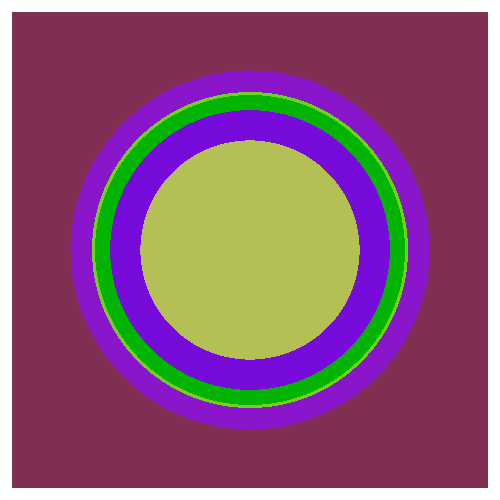

In [32]:
model.materials.export_to_xml()
model.geometry.export_to_xml()

plot = openmc.Plot()
plot.filename = 'pin_cell_4reg'
plot.from_geometry(model.geometry)
plot.pixels = (500, 500)
dr = pitch * 0.05
plot.width = (pitch+dr, pitch+dr)
plot.origin = (0., 0., 0)
plot.color_by = 'cell'

model.plots = openmc.Plots([plot])
plot.to_ipython_image(openmc_exec='openmc', cwd='./')

###  Settings

In [33]:
settings = openmc.Settings()

bounds = [-pitch/2, -pitch/2, -rod_height/2, pitch/2, +pitch/2, rod_height/2]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)

source = openmc.IndependentSource(space=uniform_dist)

settings.source = source

settings.batches = 30
settings.inactive = 20
settings.particles = 20000
settings.keff_trigger = {'type':'std_dev','threshold':0.00030}
settings.trigger_active = True
settings.trigger_max_batches = 50000
settings.output = {'tallies':True}

settings.temperature['method'] = 'interpolation'

model.settings = settings

settings_file = settings

### Tallies

In [34]:
tallies = openmc.Tallies()
model.tallies = tallies

### Define and choose energy group

In [35]:
egroup_name = 'SHEM-361'
egroup = openmc.mgxs.GROUP_STRUCTURES[egroup_name]

### Create MGXS tallies for mgxs directory

In [36]:
mgxs_lib_dict = {}

pn_order = [0,1,3,5,7]

for pn in pn_order:
    
    mgxs_lib_ = openmc.mgxs.Library(model.geometry)
    groups = openmc.mgxs.EnergyGroups(egroup)

    mgxs_lib_.energy_groups = groups
    mgxs_lib_.scatter_format = "legendre"
    mgxs_lib_.mgxs_types = ['transport','nu-transport','absorption', 'nu-fission', 'fission' ,\
                                  'chi', 'consistent scatter matrix', 'multiplicity matrix','total',\
                                  'consistent nu-scatter matrix']

    mgxs_lib_.legendre_order = pn
    if pn == 0:
        mgxs_lib_.correction = None
        
    mgxs_lib_.by_nuclide = False
    mgxs_lib_.domain_type = 'cell'
    mgxs_lib_.domains = model.geometry.get_all_material_cells().values()
    mgxs_lib_.build_library()
    mgxs_lib_.check_library_for_openmc_mgxs()
    
    mgxs_lib_.add_to_tallies_file(tallies, merge=False)
    
    mgxs_lib_dict[pn] = copy.deepcopy(mgxs_lib_)

/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 1 is greater than zero
  warn(msg, RuntimeWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 3 is greater than zero
  warn(msg, RuntimeWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 5 is greater than zero
  warn(msg, RuntimeWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)


### Create power tally

model.export_to_model_xml('model_iso.xml')

### Run OpenMC model

In [37]:
statepoint_filename = model.run()

/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=1.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=2.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=3.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=4.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=21.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=31.
  warn(msg, IDWarning)
/Users/jean.ragusa/anacond

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

       42/1    1.17142    1.18401 +/- 0.00263
 Triggers unsatisfied, max unc./thresh. is 4.952878249461118 for eigenvalue
 The estimated number of batches is 560
       43/1    1.19632    1.18454 +/- 0.00257
 Triggers unsatisfied, max unc./thresh. is 4.730003412240204 for eigenvalue
 The estimated number of batches is 535
       44/1    1.18442    1.18454 +/- 0.00246
 Triggers unsatisfied, max unc./thresh. is 4.555512298702654 for eigenvalue
 The estimated number of batches is 519
       45/1    1.19065    1.18478 +/- 0.00237
 Triggers unsatisfied, max unc./thresh. is 4.448004378210546 for eigenvalue
 The estimated number of batches is 515
       46/1    1.19406    1.18514 +/- 0.00231
 Triggers unsatisfied, max unc./thresh. is 4.250172832564656 for eigenvalue
 The estimated number of batches is 490
       47/1    1.19474    1.18550 +/- 0.00225
 Triggers unsatisfied, max unc./thresh. is 4.209081420358685 for eigenvalue
 The estimated number of batches is 499
       48/1    1.19939    1.

       93/1    1.21277    1.18713 +/- 0.00123
 Triggers unsatisfied, max unc./thresh. is 2.4496209524351023 for eigenvalue
 The estimated number of batches is 459
       94/1    1.17669    1.18699 +/- 0.00122
 Triggers unsatisfied, max unc./thresh. is 2.42262208662801 for eigenvalue
 The estimated number of batches is 455
       95/1    1.20466    1.18722 +/- 0.00122
 Triggers unsatisfied, max unc./thresh. is 2.4527447080586797 for eigenvalue
 The estimated number of batches is 472
       96/1    1.17964    1.18712 +/- 0.00121
 Triggers unsatisfied, max unc./thresh. is 2.433349633599195 for eigenvalue
 The estimated number of batches is 471
       97/1    1.19477    1.18722 +/- 0.00120
 Triggers unsatisfied, max unc./thresh. is 2.4252505297095692 for eigenvalue
 The estimated number of batches is 473
       98/1    1.17091    1.18701 +/- 0.00120
 Triggers unsatisfied, max unc./thresh. is 2.4771626395978315 for eigenvalue
 The estimated number of batches is 499
       99/1    1.19282   

      144/1    1.17776    1.18681 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.9740313025659444 for eigenvalue
 The estimated number of batches is 504
      145/1    1.20315    1.18694 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.9609925334769718 for eigenvalue
 The estimated number of batches is 501
      146/1    1.16024    1.18673 +/- 0.00094
 Triggers unsatisfied, max unc./thresh. is 1.9602116020679812 for eigenvalue
 The estimated number of batches is 505
      147/1    1.17243    1.18662 +/- 0.00094
 Triggers unsatisfied, max unc./thresh. is 1.953582082591582 for eigenvalue
 The estimated number of batches is 505
      148/1    1.17554    1.18653 +/- 0.00093
 Triggers unsatisfied, max unc./thresh. is 1.9460444411433928 for eigenvalue
 The estimated number of batches is 505
      149/1    1.19068    1.18656 +/- 0.00093
 Triggers unsatisfied, max unc./thresh. is 1.9327700145105422 for eigenvalue
 The estimated number of batches is 502
      150/1    1.18598 

      195/1    1.17117    1.18634 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.6926503804605049 for eigenvalue
 The estimated number of batches is 522
      196/1    1.17256    1.18626 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.6833676215265547 for eigenvalue
 The estimated number of batches is 519
      197/1    1.18811    1.18627 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.6809418161118777 for eigenvalue
 The estimated number of batches is 521
      198/1    1.18864    1.18628 +/- 0.00080
 Triggers unsatisfied, max unc./thresh. is 1.67138274139286 for eigenvalue
 The estimated number of batches is 518
      199/1    1.17850    1.18624 +/- 0.00080
 Triggers unsatisfied, max unc./thresh. is 1.665260964819098 for eigenvalue
 The estimated number of batches is 517
      200/1    1.18082    1.18621 +/- 0.00080
 Triggers unsatisfied, max unc./thresh. is 1.6695717412539985 for eigenvalue
 The estimated number of batches is 522
      201/1    1.18405   

      246/1    1.15644    1.18582 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.495998205181538 for eigenvalue
 The estimated number of batches is 526
      247/1    1.19396    1.18585 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.4932343156519112 for eigenvalue
 The estimated number of batches is 527
      248/1    1.18998    1.18587 +/- 0.00071
 Triggers unsatisfied, max unc./thresh. is 1.486729468099909 for eigenvalue
 The estimated number of batches is 524
      249/1    1.18150    1.18585 +/- 0.00071
 Triggers unsatisfied, max unc./thresh. is 1.4813199444817933 for eigenvalue
 The estimated number of batches is 523
      250/1    1.20008    1.18591 +/- 0.00071
 Triggers unsatisfied, max unc./thresh. is 1.4860893084284936 for eigenvalue
 The estimated number of batches is 528
      251/1    1.20417    1.18599 +/- 0.00071
 Triggers unsatisfied, max unc./thresh. is 1.4828496232735981 for eigenvalue
 The estimated number of batches is 528
      252/1    1.18816  

      297/1    1.17670    1.18598 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.3307362772251758 for eigenvalue
 The estimated number of batches is 511
      298/1    1.20251    1.18604 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.3261432065113616 for eigenvalue
 The estimated number of batches is 509
      299/1    1.18469    1.18603 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.3216164989887977 for eigenvalue
 The estimated number of batches is 508
      300/1    1.17367    1.18599 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.3179429907765465 for eigenvalue
 The estimated number of batches is 507
      301/1    1.20734    1.18607 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.317530017795901 for eigenvalue
 The estimated number of batches is 508
      302/1    1.19371    1.18609 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.3129348833160859 for eigenvalue
 The estimated number of batches is 507
      303/1    1.19708 

      348/1    1.20022    1.18601 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.2119595018170124 for eigenvalue
 The estimated number of batches is 502
      349/1    1.19177    1.18603 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.2082237764840948 for eigenvalue
 The estimated number of batches is 501
      350/1    1.16898    1.18598 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.2090328118624187 for eigenvalue
 The estimated number of batches is 503
      351/1    1.19020    1.18599 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.2053233238723955 for eigenvalue
 The estimated number of batches is 501
      352/1    1.17449    1.18595 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.201925447393522 for eigenvalue
 The estimated number of batches is 500
      353/1    1.17089    1.18591 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.2003615495741637 for eigenvalue
 The estimated number of batches is 500
      354/1    1.20158 

      399/1    1.20226    1.18630 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.1093308713941183 for eigenvalue
 The estimated number of batches is 487
      400/1    1.19097    1.18631 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1064033219261584 for eigenvalue
 The estimated number of batches is 486
      401/1    1.18341    1.18630 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1042564686968486 for eigenvalue
 The estimated number of batches is 485
      402/1    1.18013    1.18629 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1049895962274763 for eigenvalue
 The estimated number of batches is 487
      403/1    1.18067    1.18627 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1023695657013788 for eigenvalue
 The estimated number of batches is 486
      404/1    1.20079    1.18631 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1005493708474872 for eigenvalue
 The estimated number of batches is 486
      405/1    1.19077

      450/1    1.18653    1.18649 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0424316972001149 for eigenvalue
 The estimated number of batches is 488
      451/1    1.18677    1.18649 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0407716885888736 for eigenvalue
 The estimated number of batches is 487
      452/1    1.20372    1.18653 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0394292302802284 for eigenvalue
 The estimated number of batches is 487
      453/1    1.19983    1.18656 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0381831021736858 for eigenvalue
 The estimated number of batches is 487
      454/1    1.17696    1.18654 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0358585901942878 for eigenvalue
 The estimated number of batches is 486
      455/1    1.18291    1.18653 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0335917030734216 for eigenvalue
 The estimated number of batches is 485
      456/1    1.18531

In [38]:
ce_spfile = f'./statepoint_{egroup_name}_4reg_ce.h5'
ce_sumfile = f'./summary_{egroup_name}_4reg_ce.h5'
print(ce_spfile)

./statepoint_SHEM-361_4reg_ce.h5


In [39]:
os.rename(statepoint_filename, ce_spfile)
os.rename('summary.h5', ce_sumfile)

In [40]:
# trick to make several runs work with jupyter
try:
    sp 
    print('sp found')
    sp.close()
except NameError:
    print('sp NOT found')

sp NOT found


In [41]:
sp = openmc.StatePoint(ce_spfile, autolink=False)
su = openmc.Summary(ce_sumfile)
sp.link_with_summary(su)

In [43]:
for pn in pn_order:
    print("pn=",pn)
    mgxs_lib_order = copy.deepcopy(mgxs_lib_dict[pn])
    
    mgxs_lib_order.load_from_statepoint(sp)
    
# this may not be necessary:
#     mgxs_file_order = mgxs_lib_order.create_mg_library(xs_type='macro', \
#                                                     xsdata_names=['fuel', 'clad', 'moderator'])
        
    mgxs_file_order, materials_file, geometry_file = mgxs_lib_order.create_mg_mode(\
                             xsdata_names=['fuel1', 'fuel2', 'fuel3', 'fuel4', 'clad', 'moderator'])

    # set temperatures for all materials (4 fuels + clad + moderator)
    mgxs_file_order.xsdatas[0].temperatures=[565.]
    mgxs_file_order.xsdatas[1].temperatures=[565.]
    mgxs_file_order.xsdatas[2].temperatures=[565.]
    mgxs_file_order.xsdatas[3].temperatures=[565.]
    mgxs_file_order.xsdatas[4].temperatures=[565.]
    mgxs_file_order.xsdatas[5].temperatures=[565.]

    mgxs_file_order.export_to_hdf5(f'mgxs_order{pn}_{egroup_name}_4reg.h5')
    materials_file.cross_sections = f'mgxs_order{pn}_{egroup_name}_4reg.h5'
    
    model_order = openmc.Model()
    model_order.materials = materials_file
    model_order.geometry = geometry_file
    settings_file.energy_mode = 'multi-group'
    model_order.settings = settings_file   
    
    statepoint_filename_order = model_order.run()

pn= 0
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ###############

 Loading fuel3 data...
 Loading fuel4 data...


 Loading clad data...
 Loading moderator data...


 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.18939


        2/1    1.18159
        3/1    1.20854
        4/1    1.18452
        5/1    1.19186
        6/1    1.20655
        7/1    1.20051
        8/1    1.16404
        9/1    1.18873
       10/1    1.19215
       11/1    1.18554
       12/1    1.18171
       13/1    1.19603
       14/1    1.19286
       15/1    1.17584
       16/1    1.18972
       17/1    1.16707
       18/1    1.17826
       19/1    1.17612
       20/1    1.17072
       21/1    1.20116
       22/1    1.18435    1.19275 +/- 0.00841
       23/1    1.18731    1.19094 +/- 0.00518
       24/1    1.18292    1.18893 +/- 0.00418
       25/1    1.19670    1.19049 +/- 0.00359
       26/1    1.16146    1.18565 +/- 0.00566
       27/1    1.19089    1.18640 +/- 0.00484
       28/1    1.19268    1.18718 +/- 0.00426
       29/1    1.19829    1.18842 +/- 0.00396
       30/1    1.17063    1.18664 +/- 0.00396
 Triggers unsatisfied, max unc./thresh. is 6.291175433969089 for eigenvalue
 The estimated number of batches is 416
 Creating 

       78/1    1.20517    1.18561 +/- 0.00137
 Triggers unsatisfied, max unc./thresh. is 2.092707086405792 for eigenvalue
 The estimated number of batches is 275
       79/1    1.18818    1.18565 +/- 0.00134
 Triggers unsatisfied, max unc./thresh. is 2.0566360764219986 for eigenvalue
 The estimated number of batches is 270
       80/1    1.18610    1.18566 +/- 0.00132
 Triggers unsatisfied, max unc./thresh. is 2.0224659583681612 for eigenvalue
 The estimated number of batches is 266
       81/1    1.20504    1.18598 +/- 0.00134
 Triggers unsatisfied, max unc./thresh. is 2.004632877750047 for eigenvalue
 The estimated number of batches is 266
       82/1    1.17603    1.18582 +/- 0.00133
 Triggers unsatisfied, max unc./thresh. is 2.0960330974004076 for eigenvalue
 The estimated number of batches is 293
       83/1    1.17956    1.18572 +/- 0.00131
 Triggers unsatisfied, max unc./thresh. is 2.082891841113761 for eigenvalue
 The estimated number of batches is 294
       84/1    1.18177   

      131/1    1.19912    1.18653 +/- 0.00098
 Triggers unsatisfied, max unc./thresh. is 1.6453183945375789 for eigenvalue
 The estimated number of batches is 321
      132/1    1.17770    1.18645 +/- 0.00098
 Triggers unsatisfied, max unc./thresh. is 1.6353307785411166 for eigenvalue
 The estimated number of batches is 320
      133/1    1.18105    1.18640 +/- 0.00097
 Triggers unsatisfied, max unc./thresh. is 1.637260695979488 for eigenvalue
 The estimated number of batches is 323
      134/1    1.19558    1.18648 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.6277836081152386 for eigenvalue
 The estimated number of batches is 323
      135/1    1.17976    1.18642 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.6325953218785665 for eigenvalue
 The estimated number of batches is 327
      136/1    1.19157    1.18647 +/- 0.00095
 Triggers unsatisfied, max unc./thresh. is 1.6186697473718508 for eigenvalue
 The estimated number of batches is 324
      137/1    1.19498 

      182/1    1.18356    1.18625 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.4151201563287554 for eigenvalue
 The estimated number of batches is 345
      183/1    1.16732    1.18613 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.4073167845447594 for eigenvalue
 The estimated number of batches is 343
      184/1    1.18094    1.18610 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.400280745137821 for eigenvalue
 The estimated number of batches is 342
      185/1    1.21357    1.18627 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.4197491994760245 for eigenvalue
 The estimated number of batches is 353
      186/1    1.17155    1.18618 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.411896340634896 for eigenvalue
 The estimated number of batches is 351
      187/1    1.18503    1.18617 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.409143772509752 for eigenvalue
 The estimated number of batches is 352
      188/1    1.19377   

      235/1    1.19500    1.18622 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.2900286707260489 for eigenvalue
 The estimated number of batches is 378
      236/1    1.17154    1.18615 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.2837329575973544 for eigenvalue
 The estimated number of batches is 376
      237/1    1.17881    1.18612 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.284129851460504 for eigenvalue
 The estimated number of batches is 378
      238/1    1.19122    1.18614 +/- 0.00071
 Triggers unsatisfied, max unc./thresh. is 1.278621581277182 for eigenvalue
 The estimated number of batches is 377
      239/1    1.15330    1.18599 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.2832370603849985 for eigenvalue
 The estimated number of batches is 381
      240/1    1.17712    1.18595 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.279085393165068 for eigenvalue
 The estimated number of batches is 380
      241/1    1.17541   

      288/1    1.17950    1.18566 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1280648039742012 for eigenvalue
 The estimated number of batches is 362
      289/1    1.18987    1.18568 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1247924066440074 for eigenvalue
 The estimated number of batches is 361
      290/1    1.19089    1.18570 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1210889067810008 for eigenvalue
 The estimated number of batches is 360
      291/1    1.17682    1.18566 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1250550688326086 for eigenvalue
 The estimated number of batches is 364
      292/1    1.20425    1.18573 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1222880701222404 for eigenvalue
 The estimated number of batches is 363
      293/1    1.18090    1.18571 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1180697539335975 for eigenvalue
 The estimated number of batches is 362
      294/1    1.17083

      340/1    1.15571    1.18574 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0383697228996391 for eigenvalue
 The estimated number of batches is 366
      341/1    1.18905    1.18575 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0354303986786115 for eigenvalue
 The estimated number of batches is 365
      342/1    1.18010    1.18573 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0338537267594876 for eigenvalue
 The estimated number of batches is 365
      343/1    1.19729    1.18577 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0314769116139981 for eigenvalue
 The estimated number of batches is 364
      344/1    1.18892    1.18578 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.0284618414015247 for eigenvalue
 The estimated number of batches is 363
      345/1    1.18376    1.18577 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.035139529661737 for eigenvalue
 The estimated number of batches is 369
      346/1    1.18252 

 Loading fuel3 data...
 Loading fuel4 data...


 Loading clad data...
 Loading moderator data...


 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.18184


        2/1    1.17854
        3/1    1.18123
        4/1    1.19642
        5/1    1.18342
        6/1    1.18593
        7/1    1.18628
        8/1    1.19646
        9/1    1.18927
       10/1    1.17532
       11/1    1.17603
       12/1    1.17987
       13/1    1.20260
       14/1    1.19192
       15/1    1.16857
       16/1    1.19137
       17/1    1.17973
       18/1    1.18019
       19/1    1.18254
       20/1    1.19805
       21/1    1.18101
       22/1    1.18531    1.18316 +/- 0.00215
       23/1    1.20214    1.18949 +/- 0.00645
       24/1    1.19478    1.19081 +/- 0.00475
       25/1    1.19634    1.19192 +/- 0.00384
       26/1    1.17781    1.18957 +/- 0.00392
       27/1    1.19201    1.18991 +/- 0.00333
       28/1    1.18642    1.18948 +/- 0.00292
       29/1    1.18179    1.18862 +/- 0.00271
       30/1    1.19647    1.18941 +/- 0.00255
 Triggers unsatisfied, max unc./thresh. is 9.578487410064845 for eigenvalue
 The estimated number of batches is 938
 Creating 

       77/1    1.19863    1.18652 +/- 0.00109
 Triggers unsatisfied, max unc./thresh. is 2.4629777470777414 for eigenvalue
 The estimated number of batches is 366
       78/1    1.17538    1.18632 +/- 0.00108
 Triggers unsatisfied, max unc./thresh. is 2.428786818849028 for eigenvalue
 The estimated number of batches is 363
       79/1    1.18900    1.18637 +/- 0.00107
 Triggers unsatisfied, max unc./thresh. is 2.3989930315921115 for eigenvalue
 The estimated number of batches is 360
       80/1    1.21015    1.18677 +/- 0.00112
 Triggers unsatisfied, max unc./thresh. is 2.384218809666236 for eigenvalue
 The estimated number of batches is 362
       81/1    1.18959    1.18681 +/- 0.00110
 Triggers unsatisfied, max unc./thresh. is 2.361479555705703 for eigenvalue
 The estimated number of batches is 361
       82/1    1.18898    1.18685 +/- 0.00109
 Triggers unsatisfied, max unc./thresh. is 2.3231206005235165 for eigenvalue
 The estimated number of batches is 355
       83/1    1.18835   

      128/1    1.15576    1.18596 +/- 0.00089
 Triggers unsatisfied, max unc./thresh. is 1.8036028787907197 for eigenvalue
 The estimated number of batches is 372
      129/1    1.18567    1.18596 +/- 0.00088
 Triggers unsatisfied, max unc./thresh. is 1.792770219389049 for eigenvalue
 The estimated number of batches is 371
      130/1    1.18545    1.18595 +/- 0.00087
 Triggers unsatisfied, max unc./thresh. is 1.801293654015114 for eigenvalue
 The estimated number of batches is 377
      131/1    1.16730    1.18579 +/- 0.00088
 Triggers unsatisfied, max unc./thresh. is 1.7972091765520546 for eigenvalue
 The estimated number of batches is 379
      132/1    1.18059    1.18574 +/- 0.00087
 Triggers unsatisfied, max unc./thresh. is 1.790287196994635 for eigenvalue
 The estimated number of batches is 379
      133/1    1.19679    1.18584 +/- 0.00087
 Triggers unsatisfied, max unc./thresh. is 1.81377074196805 for eigenvalue
 The estimated number of batches is 392
      134/1    1.15779    1

      179/1    1.20033    1.18590 +/- 0.00077
 Triggers unsatisfied, max unc./thresh. is 1.49664516116236 for eigenvalue
 The estimated number of batches is 377
      180/1    1.19389    1.18595 +/- 0.00077
 Triggers unsatisfied, max unc./thresh. is 1.4893808130449109 for eigenvalue
 The estimated number of batches is 375
      181/1    1.18054    1.18592 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.4816636458437569 for eigenvalue
 The estimated number of batches is 374
      182/1    1.18075    1.18589 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.4776692669365745 for eigenvalue
 The estimated number of batches is 374
      183/1    1.18285    1.18587 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.4691845434159923 for eigenvalue
 The estimated number of batches is 372
      184/1    1.16962    1.18577 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.4976130198971898 for eigenvalue
 The estimated number of batches is 388
      185/1    1.17869  

      232/1    1.19868    1.18606 +/- 0.00067
 Triggers unsatisfied, max unc./thresh. is 1.327444034046557 for eigenvalue
 The estimated number of batches is 394
      233/1    1.19420    1.18610 +/- 0.00067
 Triggers unsatisfied, max unc./thresh. is 1.32263007445185 for eigenvalue
 The estimated number of batches is 393
      234/1    1.19063    1.18612 +/- 0.00067
 Triggers unsatisfied, max unc./thresh. is 1.319428396475549 for eigenvalue
 The estimated number of batches is 393
      235/1    1.21034    1.18624 +/- 0.00068
 Triggers unsatisfied, max unc./thresh. is 1.3213471938283021 for eigenvalue
 The estimated number of batches is 396
      236/1    1.18708    1.18624 +/- 0.00067
 Triggers unsatisfied, max unc./thresh. is 1.3186943570491356 for eigenvalue
 The estimated number of batches is 396
      237/1    1.19373    1.18628 +/- 0.00067
 Triggers unsatisfied, max unc./thresh. is 1.3133083137058477 for eigenvalue
 The estimated number of batches is 395
      238/1    1.18152    

      283/1    1.19639    1.18653 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.1969586487791395 for eigenvalue
 The estimated number of batches is 397
      284/1    1.19474    1.18656 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.1936913741601043 for eigenvalue
 The estimated number of batches is 397
      285/1    1.18769    1.18657 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.1891055440838714 for eigenvalue
 The estimated number of batches is 395
      286/1    1.17969    1.18654 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.187301685563476 for eigenvalue
 The estimated number of batches is 395
      287/1    1.19355    1.18657 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.1880276408555532 for eigenvalue
 The estimated number of batches is 397
      288/1    1.18031    1.18655 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.1873121068292483 for eigenvalue
 The estimated number of batches is 398
      289/1    1.19289 

      336/1    1.17769    1.18657 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.105909319836568 for eigenvalue
 The estimated number of batches is 407
      337/1    1.18501    1.18657 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.1024314230369983 for eigenvalue
 The estimated number of batches is 406
      338/1    1.19131    1.18658 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.099104424261328 for eigenvalue
 The estimated number of batches is 405
      339/1    1.19265    1.18660 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0981263104682604 for eigenvalue
 The estimated number of batches is 405
      340/1    1.18984    1.18661 +/- 0.00057
 Triggers unsatisfied, max unc./thresh. is 1.0947918154909162 for eigenvalue
 The estimated number of batches is 404
      341/1    1.18609    1.18661 +/- 0.00057
 Triggers unsatisfied, max unc./thresh. is 1.0914737435221264 for eigenvalue
 The estimated number of batches is 403
      342/1    1.16876  

      388/1    1.18987    1.18652 +/- 0.00053
 Triggers unsatisfied, max unc./thresh. is 1.0111130538005988 for eigenvalue
 The estimated number of batches is 397
      389/1    1.17550    1.18649 +/- 0.00053
 Triggers unsatisfied, max unc./thresh. is 1.0093869093644745 for eigenvalue
 The estimated number of batches is 396
      390/1    1.17718    1.18646 +/- 0.00053
 Triggers unsatisfied, max unc./thresh. is 1.0071431703019815 for eigenvalue
 The estimated number of batches is 396
      391/1    1.19179    1.18648 +/- 0.00053
 Triggers unsatisfied, max unc./thresh. is 1.004523664375996 for eigenvalue
 The estimated number of batches is 395
      392/1    1.19487    1.18650 +/- 0.00053
 Triggers unsatisfied, max unc./thresh. is 1.0018911456502733 for eigenvalue
 The estimated number of batches is 394
      393/1    1.19343    1.18652 +/- 0.00053
 Triggers satisfied for batch 393
 Creating state point statepoint.00393.h5...

 =======================>     TIMING STATISTICS     <=======

 Loading fuel3 data...
 Loading fuel4 data...


 Loading clad data...
 Loading moderator data...


 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.17493


        2/1    1.19764
        3/1    1.19153
        4/1    1.18794
        5/1    1.17520
        6/1    1.19406
        7/1    1.20168
        8/1    1.21053
        9/1    1.19444
       10/1    1.19252
       11/1    1.18775
       12/1    1.20819
       13/1    1.18306
       14/1    1.18526
       15/1    1.17685
       16/1    1.18243
       17/1    1.17045
       18/1    1.17729
       19/1    1.19020
       20/1    1.18139
       21/1    1.19029
       22/1    1.18009    1.18519 +/- 0.00510
       23/1    1.18160    1.18399 +/- 0.00318
       24/1    1.19830    1.18757 +/- 0.00422
       25/1    1.20419    1.19089 +/- 0.00466
       26/1    1.17772    1.18870 +/- 0.00440
       27/1    1.20743    1.19137 +/- 0.00458
       28/1    1.17430    1.18924 +/- 0.00450
       29/1    1.16596    1.18665 +/- 0.00474
       30/1    1.15923    1.18391 +/- 0.00505
 Triggers unsatisfied, max unc./thresh. is 7.534217539293493 for eigenvalue
 The estimated number of batches is 588
 Creating 

       77/1    1.18413    1.18465 +/- 0.00146
 Triggers unsatisfied, max unc./thresh. is 2.5629294454594436 for eigenvalue
 The estimated number of batches is 395
       78/1    1.18353    1.18463 +/- 0.00143
 Triggers unsatisfied, max unc./thresh. is 2.5217646172382757 for eigenvalue
 The estimated number of batches is 389
       79/1    1.20403    1.18496 +/- 0.00145
 Triggers unsatisfied, max unc./thresh. is 2.4716794660612917 for eigenvalue
 The estimated number of batches is 381
       80/1    1.16752    1.18467 +/- 0.00145
 Triggers unsatisfied, max unc./thresh. is 2.492530439743919 for eigenvalue
 The estimated number of batches is 393
       81/1    1.17465    1.18451 +/- 0.00144
 Triggers unsatisfied, max unc./thresh. is 2.4615501723651567 for eigenvalue
 The estimated number of batches is 390
       82/1    1.21064    1.18493 +/- 0.00148
 Triggers unsatisfied, max unc./thresh. is 2.4125231370422004 for eigenvalue
 The estimated number of batches is 381
       83/1    1.20021 

      129/1    1.19470    1.18503 +/- 0.00111
 Triggers unsatisfied, max unc./thresh. is 1.873447492742078 for eigenvalue
 The estimated number of batches is 403
      130/1    1.19809    1.18515 +/- 0.00111
 Triggers unsatisfied, max unc./thresh. is 1.8653446267319036 for eigenvalue
 The estimated number of batches is 403
      131/1    1.19961    1.18528 +/- 0.00111
 Triggers unsatisfied, max unc./thresh. is 1.8481733820884587 for eigenvalue
 The estimated number of batches is 400
      132/1    1.17819    1.18522 +/- 0.00110
 Triggers unsatisfied, max unc./thresh. is 1.833828787300372 for eigenvalue
 The estimated number of batches is 397
      133/1    1.19048    1.18526 +/- 0.00109
 Triggers unsatisfied, max unc./thresh. is 1.8487351472560667 for eigenvalue
 The estimated number of batches is 407
      134/1    1.17188    1.18515 +/- 0.00109
 Triggers unsatisfied, max unc./thresh. is 1.834056507333314 for eigenvalue
 The estimated number of batches is 404
      135/1    1.17922   

      182/1    1.19311    1.18608 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.5386126308299237 for eigenvalue
 The estimated number of batches is 404
      183/1    1.16331    1.18594 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.5306850120622213 for eigenvalue
 The estimated number of batches is 402
      184/1    1.17409    1.18587 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.5234700104106986 for eigenvalue
 The estimated number of batches is 401
      185/1    1.18689    1.18587 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.5140934659720937 for eigenvalue
 The estimated number of batches is 399
      186/1    1.17758    1.18582 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.5060089559440115 for eigenvalue
 The estimated number of batches is 397
      187/1    1.17138    1.18574 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.4973015144098876 for eigenvalue
 The estimated number of batches is 395
      188/1    1.19333

      233/1    1.19314    1.18613 +/- 0.00080
 Triggers unsatisfied, max unc./thresh. is 1.3235780276737166 for eigenvalue
 The estimated number of batches is 394
      234/1    1.17868    1.18610 +/- 0.00079
 Triggers unsatisfied, max unc./thresh. is 1.3183289189227891 for eigenvalue
 The estimated number of batches is 392
      235/1    1.17716    1.18606 +/- 0.00079
 Triggers unsatisfied, max unc./thresh. is 1.313648522372513 for eigenvalue
 The estimated number of batches is 392
      236/1    1.17720    1.18601 +/- 0.00079
 Triggers unsatisfied, max unc./thresh. is 1.3134250261849045 for eigenvalue
 The estimated number of batches is 393
      237/1    1.18574    1.18601 +/- 0.00078
 Triggers unsatisfied, max unc./thresh. is 1.3088159298832254 for eigenvalue
 The estimated number of batches is 392
      238/1    1.18933    1.18603 +/- 0.00078
 Triggers unsatisfied, max unc./thresh. is 1.3036742631719815 for eigenvalue
 The estimated number of batches is 391
      239/1    1.19381 

      284/1    1.17478    1.18573 +/- 0.00069
 Triggers unsatisfied, max unc./thresh. is 1.1721876975190249 for eigenvalue
 The estimated number of batches is 383
      285/1    1.18515    1.18573 +/- 0.00069
 Triggers unsatisfied, max unc./thresh. is 1.1694423304733692 for eigenvalue
 The estimated number of batches is 383
      286/1    1.19170    1.18575 +/- 0.00068
 Triggers unsatisfied, max unc./thresh. is 1.1667904506104037 for eigenvalue
 The estimated number of batches is 383
      287/1    1.18737    1.18576 +/- 0.00068
 Triggers unsatisfied, max unc./thresh. is 1.1635930812742523 for eigenvalue
 The estimated number of batches is 382
      288/1    1.19119    1.18578 +/- 0.00068
 Triggers unsatisfied, max unc./thresh. is 1.1654481816798 for eigenvalue
 The estimated number of batches is 385
      289/1    1.18566    1.18578 +/- 0.00068
 Triggers unsatisfied, max unc./thresh. is 1.1616757894163303 for eigenvalue
 The estimated number of batches is 384
      290/1    1.20263   

      335/1    1.19689    1.18536 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.069627890344225 for eigenvalue
 The estimated number of batches is 381
      336/1    1.20858    1.18544 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.0714487280519156 for eigenvalue
 The estimated number of batches is 383
      337/1    1.19332    1.18546 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.0684635902303847 for eigenvalue
 The estimated number of batches is 382
      338/1    1.18934    1.18547 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.0657253593579268 for eigenvalue
 The estimated number of batches is 382
      339/1    1.18651    1.18548 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.0623727122203606 for eigenvalue
 The estimated number of batches is 381
      340/1    1.18512    1.18547 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.060720543308193 for eigenvalue
 The estimated number of batches is 381
      341/1    1.18815  

 Loading fuel3 data...
 Loading fuel4 data...


 Loading clad data...
 Loading moderator data...


 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.17660


        2/1    1.17336
        3/1    1.19090
        4/1    1.18865
        5/1    1.19672
        6/1    1.17808
        7/1    1.17754
        8/1    1.18022
        9/1    1.18826
       10/1    1.17224
       11/1    1.18880
       12/1    1.20047
       13/1    1.19074
       14/1    1.18562
       15/1    1.18111
       16/1    1.19479
       17/1    1.20665
       18/1    1.17986
       19/1    1.18175
       20/1    1.19911
       21/1    1.18950
       22/1    1.19553    1.19251 +/- 0.00301
       23/1    1.18513    1.19005 +/- 0.00302
       24/1    1.18817    1.18958 +/- 0.00218
       25/1    1.18890    1.18944 +/- 0.00170
       26/1    1.19585    1.19051 +/- 0.00175
       27/1    1.19381    1.19098 +/- 0.00155
       28/1    1.18459    1.19018 +/- 0.00156
       29/1    1.18767    1.18990 +/- 0.00141
       30/1    1.19302    1.19022 +/- 0.00130
 Triggers unsatisfied, max unc./thresh. is 3.794858327364416 for eigenvalue
 The estimated number of batches is 165
 Creating 

       76/1    1.18649    1.18696 +/- 0.00115
 Triggers unsatisfied, max unc./thresh. is 2.332985689954204 for eigenvalue
 The estimated number of batches is 325
       77/1    1.18176    1.18687 +/- 0.00114
 Triggers unsatisfied, max unc./thresh. is 2.2967840868230374 for eigenvalue
 The estimated number of batches is 321
       78/1    1.19184    1.18695 +/- 0.00112
 Triggers unsatisfied, max unc./thresh. is 2.2592357951893667 for eigenvalue
 The estimated number of batches is 317
       79/1    1.18009    1.18684 +/- 0.00111
 Triggers unsatisfied, max unc./thresh. is 2.2733016754583115 for eigenvalue
 The estimated number of batches is 325
       80/1    1.18080    1.18673 +/- 0.00109
 Triggers unsatisfied, max unc./thresh. is 2.260540159531784 for eigenvalue
 The estimated number of batches is 327
       81/1    1.19788    1.18692 +/- 0.00109
 Triggers unsatisfied, max unc./thresh. is 2.2305976090959136 for eigenvalue
 The estimated number of batches is 324
       82/1    1.18549  

      129/1    1.17816    1.18599 +/- 0.00093
 Triggers unsatisfied, max unc./thresh. is 1.629216241085972 for eigenvalue
 The estimated number of batches is 310
      130/1    1.18844    1.18602 +/- 0.00092
 Triggers unsatisfied, max unc./thresh. is 1.6263101813555632 for eigenvalue
 The estimated number of batches is 311
      131/1    1.17928    1.18596 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.6242909954958522 for eigenvalue
 The estimated number of batches is 313
      132/1    1.17504    1.18586 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.6145493869879963 for eigenvalue
 The estimated number of batches is 312
      133/1    1.20247    1.18601 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.6145453685856352 for eigenvalue
 The estimated number of batches is 315
      134/1    1.19154    1.18605 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.6140042263694911 for eigenvalue
 The estimated number of batches is 317
      135/1    1.16768 

      180/1    1.18461    1.18575 +/- 0.00084
 Triggers unsatisfied, max unc./thresh. is 1.501240164147613 for eigenvalue
 The estimated number of batches is 381
      181/1    1.17007    1.18566 +/- 0.00084
 Triggers unsatisfied, max unc./thresh. is 1.4964771164538777 for eigenvalue
 The estimated number of batches is 381
      182/1    1.18479    1.18565 +/- 0.00083
 Triggers unsatisfied, max unc./thresh. is 1.486450062060847 for eigenvalue
 The estimated number of batches is 378
      183/1    1.18810    1.18566 +/- 0.00083
 Triggers unsatisfied, max unc./thresh. is 1.4766410851223253 for eigenvalue
 The estimated number of batches is 376
      184/1    1.17773    1.18562 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.470469463671626 for eigenvalue
 The estimated number of batches is 375
      185/1    1.20320    1.18572 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.4810296031050683 for eigenvalue
 The estimated number of batches is 382
      186/1    1.19621   

      233/1    1.20879    1.18611 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.3097484541101494 for eigenvalue
 The estimated number of batches is 386
      234/1    1.19404    1.18615 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.306181519747762 for eigenvalue
 The estimated number of batches is 386
      235/1    1.18006    1.18612 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.3004996994948765 for eigenvalue
 The estimated number of batches is 384
      236/1    1.19465    1.18616 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.2949601094360832 for eigenvalue
 The estimated number of batches is 383
      237/1    1.18636    1.18616 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.2909281562895702 for eigenvalue
 The estimated number of batches is 382
      238/1    1.17615    1.18612 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.2857215578459575 for eigenvalue
 The estimated number of batches is 381
      239/1    1.16193 

      284/1    1.19119    1.18569 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.1806988726603023 for eigenvalue
 The estimated number of batches is 389
      285/1    1.16528    1.18561 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.177816409475933 for eigenvalue
 The estimated number of batches is 388
      286/1    1.17452    1.18557 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.1740272576783077 for eigenvalue
 The estimated number of batches is 387
      287/1    1.18372    1.18556 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.1700240368202501 for eigenvalue
 The estimated number of batches is 386
      288/1    1.18945    1.18558 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1658470269745507 for eigenvalue
 The estimated number of batches is 385
      289/1    1.17949    1.18556 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1632957140175215 for eigenvalue
 The estimated number of batches is 385
      290/1    1.17850 

      337/1    1.19672    1.18544 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.058381299189395 for eigenvalue
 The estimated number of batches is 376
      338/1    1.18088    1.18542 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0569163698586017 for eigenvalue
 The estimated number of batches is 376
      339/1    1.19829    1.18546 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0546580387860083 for eigenvalue
 The estimated number of batches is 375
      340/1    1.19040    1.18548 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.05219593755117 for eigenvalue
 The estimated number of batches is 375
      341/1    1.16779    1.18542 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.052799472253028 for eigenvalue
 The estimated number of batches is 376
      342/1    1.17769    1.18540 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0505081886809713 for eigenvalue
 The estimated number of batches is 376
      343/1    1.17411    

 Loading fuel3 data...
 Loading fuel4 data...


 Loading clad data...
 Loading moderator data...


 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.18676


        2/1    1.17057
        3/1    1.18471
        4/1    1.18066
        5/1    1.18787
        6/1    1.20165
        7/1    1.20680
        8/1    1.18413
        9/1    1.19335
       10/1    1.17796
       11/1    1.17782
       12/1    1.17999
       13/1    1.18569
       14/1    1.19254
       15/1    1.16996
       16/1    1.21078
       17/1    1.18938
       18/1    1.19513
       19/1    1.19514
       20/1    1.17912
       21/1    1.17564
       22/1    1.19075    1.18319 +/- 0.00756
       23/1    1.18387    1.18342 +/- 0.00437
       24/1    1.21519    1.19136 +/- 0.00852
       25/1    1.18253    1.18960 +/- 0.00683
       26/1    1.20105    1.19151 +/- 0.00590
       27/1    1.19760    1.19238 +/- 0.00506
       28/1    1.18145    1.19101 +/- 0.00459
       29/1    1.18601    1.19046 +/- 0.00409
       30/1    1.18976    1.19039 +/- 0.00366
 Triggers unsatisfied, max unc./thresh. is 5.94415771091551 for eigenvalue
 The estimated number of batches is 374
 Creating s

       77/1    1.19233    1.18585 +/- 0.00124
 Triggers unsatisfied, max unc./thresh. is 2.246979664271576 for eigenvalue
 The estimated number of batches is 308
       78/1    1.16944    1.18557 +/- 0.00125
 Triggers unsatisfied, max unc./thresh. is 2.305818108357869 for eigenvalue
 The estimated number of batches is 329
       79/1    1.19345    1.18570 +/- 0.00123
 Triggers unsatisfied, max unc./thresh. is 2.295894649378133 for eigenvalue
 The estimated number of batches is 331
       80/1    1.18202    1.18564 +/- 0.00121
 Triggers unsatisfied, max unc./thresh. is 2.2543970574619014 for eigenvalue
 The estimated number of batches is 325
       81/1    1.19984    1.18588 +/- 0.00122
 Triggers unsatisfied, max unc./thresh. is 2.352290328212254 for eigenvalue
 The estimated number of batches is 358
       82/1    1.20234    1.18614 +/- 0.00123
 Triggers unsatisfied, max unc./thresh. is 2.3294111181352264 for eigenvalue
 The estimated number of batches is 357
       83/1    1.18340    

      128/1    1.18593    1.18542 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.7643319575644851 for eigenvalue
 The estimated number of batches is 357
      129/1    1.21291    1.18568 +/- 0.00098
 Triggers unsatisfied, max unc./thresh. is 1.797113691271558 for eigenvalue
 The estimated number of batches is 373
      130/1    1.21557    1.18595 +/- 0.00101
 Triggers unsatisfied, max unc./thresh. is 1.778776166790656 for eigenvalue
 The estimated number of batches is 369
      131/1    1.18494    1.18594 +/- 0.00100
 Triggers unsatisfied, max unc./thresh. is 1.7650585739939197 for eigenvalue
 The estimated number of batches is 366
      132/1    1.18801    1.18596 +/- 0.00099
 Triggers unsatisfied, max unc./thresh. is 1.7609574796200254 for eigenvalue
 The estimated number of batches is 368
      133/1    1.18252    1.18593 +/- 0.00099
 Triggers unsatisfied, max unc./thresh. is 1.7939254727460388 for eigenvalue
 The estimated number of batches is 384
      134/1    1.19921  

      180/1    1.19803    1.18614 +/- 0.00079
 Triggers unsatisfied, max unc./thresh. is 1.4293879925031858 for eigenvalue
 The estimated number of batches is 347
      181/1    1.18475    1.18613 +/- 0.00079
 Triggers unsatisfied, max unc./thresh. is 1.4209689177190263 for eigenvalue
 The estimated number of batches is 346
      182/1    1.18528    1.18613 +/- 0.00078
 Triggers unsatisfied, max unc./thresh. is 1.4169832257043389 for eigenvalue
 The estimated number of batches is 346
      183/1    1.18231    1.18610 +/- 0.00078
 Triggers unsatisfied, max unc./thresh. is 1.4089001536195531 for eigenvalue
 The estimated number of batches is 344
      184/1    1.18378    1.18609 +/- 0.00077
 Triggers unsatisfied, max unc./thresh. is 1.400656974636257 for eigenvalue
 The estimated number of batches is 342
      185/1    1.18636    1.18609 +/- 0.00077
 Triggers unsatisfied, max unc./thresh. is 1.3920951204595 for eigenvalue
 The estimated number of batches is 340
      186/1    1.18980    

      233/1    1.19186    1.18621 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.2758883622859727 for eigenvalue
 The estimated number of batches is 367
      234/1    1.18749    1.18621 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.276252688137138 for eigenvalue
 The estimated number of batches is 369
      235/1    1.17519    1.18616 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.2744837485834843 for eigenvalue
 The estimated number of batches is 370
      236/1    1.17892    1.18613 +/- 0.00071
 Triggers unsatisfied, max unc./thresh. is 1.2746404901390418 for eigenvalue
 The estimated number of batches is 371
      237/1    1.16314    1.18602 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.2687536961683032 for eigenvalue
 The estimated number of batches is 370
      238/1    1.17058    1.18595 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.2639895607474145 for eigenvalue
 The estimated number of batches is 369
      239/1    1.19381 

      284/1    1.17075    1.18560 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.1939581351108548 for eigenvalue
 The estimated number of batches is 397
      285/1    1.18773    1.18561 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.1898465421771076 for eigenvalue
 The estimated number of batches is 396
      286/1    1.19115    1.18563 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.1892357632422914 for eigenvalue
 The estimated number of batches is 397
      287/1    1.19101    1.18565 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.188127654615215 for eigenvalue
 The estimated number of batches is 397
      288/1    1.19160    1.18568 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.1839800084384147 for eigenvalue
 The estimated number of batches is 396
      289/1    1.19955    1.18573 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.1810826974179216 for eigenvalue
 The estimated number of batches is 396
      290/1    1.18983 

      336/1    1.17986    1.18613 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0977331359665745 for eigenvalue
 The estimated number of batches is 401
      337/1    1.18987    1.18614 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.097595471142668 for eigenvalue
 The estimated number of batches is 402
      338/1    1.17437    1.18610 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.095271816301339 for eigenvalue
 The estimated number of batches is 402
      339/1    1.19011    1.18612 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0917496372062143 for eigenvalue
 The estimated number of batches is 401
      340/1    1.16830    1.18606 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0882260119605158 for eigenvalue
 The estimated number of batches is 399
      341/1    1.18341    1.18605 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.0857001673867483 for eigenvalue
 The estimated number of batches is 399
      342/1    1.20250  

      388/1    1.20029    1.18627 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0091466321419287 for eigenvalue
 The estimated number of batches is 395
      389/1    1.17887    1.18625 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0066734094125342 for eigenvalue
 The estimated number of batches is 394
      390/1    1.18513    1.18624 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0041130717108786 for eigenvalue
 The estimated number of batches is 394
      391/1    1.19684    1.18627 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.001806809503033 for eigenvalue
 The estimated number of batches is 393
      392/1    1.16970    1.18623 +/- 0.00056
 Triggers unsatisfied, max unc./thresh. is 1.0003039724862914 for eigenvalue
 The estimated number of batches is 393
      393/1    1.18994    1.18624 +/- 0.00056
 Triggers satisfied for batch 393
 Creating state point statepoint.00393.h5...

 =======================>     TIMING STATISTICS     <=======

## Clean up by deleting unwanted files

In [44]:
import os
import re

def delete_runtime_files(directory='.'):
    """
    Deletes all files with a .xml extension, files named statepoint.NNNNN.h5 where N is a digit,
    and the file named summary.h5 in the specified directory.

    Parameters:
    directory (str): The directory to search for files. Defaults to the current directory.
    """
    
    # Regular expression pattern to match files named statepoint.NNNNN.h5
    pattern = re.compile(r'statepoint\.\d{5}\.h5')

    # Iterate through files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Check if the file has a .xml extension, matches the pattern, or is named summary.h5
        if filename.endswith('.xml') or pattern.match(filename) or filename == 'summary.h5' \
           or filename == 'tallies.out':
            # Delete the file
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# Example usage:
# delete_runtime_files('/path/to/directory')  # specify the directory path if needed

In [45]:
delete_runtime_files('./')

Deleted: ./plots.xml
Deleted: ./statepoint.00373.h5
Deleted: ./model.xml
Deleted: ./statepoint.00030.h5
Deleted: ./statepoint.00372.h5
Deleted: ./statepoint.00381.h5
Deleted: ./summary.h5
Deleted: ./statepoint.00393.h5
Deleted: ./tallies.out
Deleted: ./materials.xml
Deleted: ./geometry.xml
